In [1]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json
import seaborn as sns
import pickle

In [3]:
import sys
sys.path.append("../code/")

In [4]:
from labs import true_optimal_mf
from objectives import get_random_guess_merit_factor, get_precomputed_labs_merit_factors

In [5]:
# Load directly optimized parameters
df_overlap = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')
df_MF = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_MF.json', orient='index')

In [6]:
# Load transferred parameters
df_tran_mf_22 = pd.read_json('../qokit/assets/transferred_from_22_MF.json', orient='index')

In [7]:
random_guess_MF = json.load(open("../qokit/assets/precomputed_random_guess_merit_factors.json", "r"))

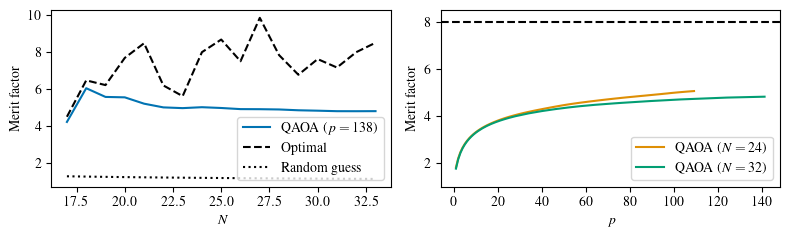

In [11]:
f, ax = plt.subplots(1,2,figsize=(8, 2.47213))

cmap = sns.color_palette("colorblind")

##########################################
# Fixed p
##########################################
dftmp = df_tran_mf_22
to_plot1 = df_tran_mf_22[(df_tran_mf_22['p'] == 138) & (df_tran_mf_22['N'] > 23)].rename(
    columns={'merit factor transferred':'merit factor'}
)
to_plot2 = df_MF[df_MF['p'] == 138]
to_plot = pd.concat([to_plot1, to_plot2])
to_plot.sort_values('N').set_index('N')['merit factor'].plot(
    ax=ax[0], label=r'QAOA ($p = 138$)', c=cmap[0]
)
Ns = sorted(set(to_plot['N']))
ax[0].plot(
    Ns, 
    [true_optimal_mf[N] for N in Ns], c='k', linestyle='dashed', label='Optimal'
)
ax[0].plot(
    Ns, 
    [random_guess_MF[str(N)] for N in Ns], 
    c='k', linestyle='dotted', label='Random guess'
)
ax[0].set_ylabel('Merit factor')
ax[0].set_xlabel(r'$N$')
ax[0].legend(loc='lower right')
# plt.savefig('figures/scaling_mf.pdf')

##########################################
# Fixed p
##########################################

N = 24
to_plot = df_MF[(df_MF['N'] == N) & (df_MF['p'] <= 141)]
to_plot.sort_values('p').set_index('p')['merit factor'].plot(
    ax=ax[1], label=r'QAOA ($N = 24$)', c=cmap[1]
)

# N = 32
N = 32
to_plot = df_tran_mf_22[(df_tran_mf_22['N'] == N) & (df_tran_mf_22['p'] <= 141)]
to_plot.sort_values('p').set_index('p')['merit factor transferred'].plot(
    ax=ax[1], label=r'QAOA ($N = 32$)', c=cmap[2]
)

ax[1].legend(loc='lower right')

ps = sorted(set(to_plot['p']))
ax[1].axhline(true_optimal_mf[N], c='k', linestyle='dashed', label='Optimal')

# legend etc
ax[1].set_ylabel('Merit factor')
ax[1].set_xlabel(r'$p$')
ax[1].set_ylim(1, true_optimal_mf[N]+0.5)
plt.tight_layout()
plt.savefig('figures/QAOA_merit_factor.pdf')

# Correlation between Hamming distance to optimal and objective

In [25]:
corrcoefs_labs = json.load(open("../qokit/assets/correlations_between_cost_and_hamm_dist.json", "r"))

In [42]:
corrcoefs_maxcut = json.load(open("../qokit/assets/correlations_between_cost_and_hamm_dist_maxcut.json", "r"))

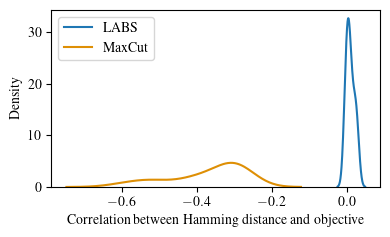

In [45]:
f, ax = plt.subplots(figsize=(4, 2.47213))
cmap = sns.color_palette("colorblind")
sns.kdeplot(corrcoefs_labs.values(), ax=ax, label='LABS', c=cmap[0])
sns.kdeplot(corrcoefs_maxcut, ax=ax, label='MaxCut', c=cmap[1])
ax.set_xlabel('Correlation between Hamming distance and objective')
ax.legend()
plt.tight_layout()
plt.savefig('figures/hamm_dist_obj_corr.pdf')

# Plot output distributions

In [268]:
pretty_print_dict = {
    'overlap' : r'$p^{\mbox{opt}}$',
    'MF' : 'MF',
}

def plot_probabilities_by_energy_level_from_row(N, p, ymax, label):
    # Throw away tiny entries for visualization
    threshold = 0
    
    f, ax = plt.subplots(figsize=(4, 2.47213))
    if p != 1:
        axins = ax.inset_axes([0.4, 0.3, 0.5, 0.6])

        axins.set_xlim(-5, 30)
        axins.set_ylim(-0.001, ymax/3)

        _, connector_lines = ax.indicate_inset_zoom(axins, edgecolor="black")
        connector_lines[3].set(visible=False)
        connector_lines[2].set(visible=True)
    
    for suffix in ['overlap', 'MF']:
        probabilities_by_energy_level, probabilities_by_energy_level_uniform = pickle.load(
            open(f'../scripts/data/probabilities_by_energy_level_{N}_{p}_{suffix}.pickle', 'rb')
        )

        print(f"Overlap with top 40: {sum(probabilities_by_energy_level[:10])}")

        ax.plot(probabilities_by_energy_level, label="QAOA "+pretty_print_dict[suffix])
        if p != 1:
            axins.plot(probabilities_by_energy_level, label="QAOA "+pretty_print_dict[suffix])
    
    ax.plot(probabilities_by_energy_level_uniform, label="Uniform")
    if p != 1:
        axins.plot(probabilities_by_energy_level_uniform, label="Uniform")
    plt.title(f"$p={p}$")
    if p == 1:
        plt.legend()
    ax.text(0.1, 0.89*ymax, label, fontsize=14)
    plt.xlim(-5, 200)
    plt.ylim(-0.001, ymax)
    plt.xlabel("Energy level index")
    plt.ylabel("Probability")
    # plt.yscale('log')
    plt.tight_layout()
    plt.savefig(f'figures/output_distribution_{N}_{p}.pdf')
    plt.show()

Overlap with top 40: 0.004221309876065245
Overlap with top 40: 0.0025804309861991673


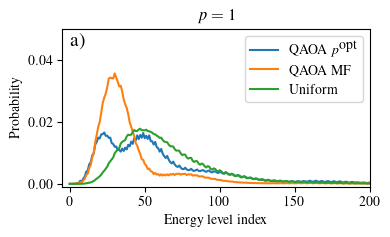

Overlap with top 40: 0.04880602965051983
Overlap with top 40: 0.04651479882242952


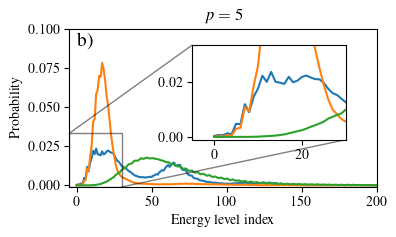

Overlap with top 40: 0.07926455686313656
Overlap with top 40: 0.37829300862093446


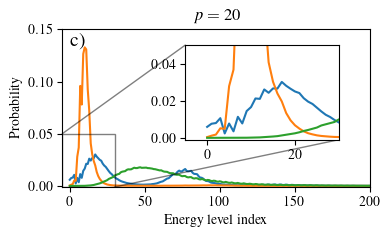

Overlap with top 40: 0.09933228850980043
Overlap with top 40: 0.6981135037534969


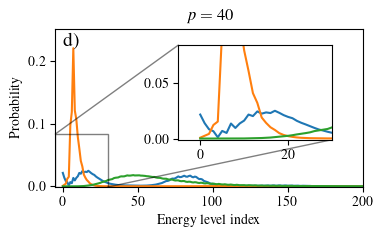

In [269]:
N = 25

# for p in [1,2,3,4, 5, 10, 20, 40]:
for p, ymax, label in [(1, 0.05, 'a)'), (5, 0.1, 'b)'), (20, 0.15, 'c)'), (40, 0.25, 'd)')]:
    plot_probabilities_by_energy_level_from_row(N, p, ymax, label)

In [270]:
N = 25
p = 40

arr1, _ = pickle.load(
    open(f'../scripts/data/probabilities_by_energy_level_{N}_{p}_overlap.pickle', 'rb')
)

arr2, _ = pickle.load(
    open(f'../scripts/data/probabilities_by_energy_level_{N}_{p}_MF.pickle', 'rb')
)

print(f"Improvement from optimizing for overlap at p={p} is {arr1[0] / arr2[0]}")

Improvement from optimizing for overlap at p=40 is 27.326881858691003


# Number of energy levels with > 6 MF

In [11]:
en = sorted(np.load("../qokit/assets/precomputed_merit_factors/precomputed_energies_25.npy"))

In [13]:
en = np.array(en)

In [19]:
en[:100]

array([-8.68055556, -8.68055556, -8.68055556, -8.68055556, -8.68055556,
       -8.68055556, -8.68055556, -8.68055556, -7.10227273, -7.10227273,
       -7.10227273, -7.10227273, -7.10227273, -7.10227273, -7.10227273,
       -7.10227273, -7.10227273, -7.10227273, -7.10227273, -7.10227273,
       -7.10227273, -7.10227273, -7.10227273, -7.10227273, -6.51041667,
       -6.51041667, -6.51041667, -6.51041667, -6.51041667, -6.51041667,
       -6.51041667, -6.51041667, -6.51041667, -6.51041667, -6.51041667,
       -6.51041667, -6.51041667, -6.51041667, -6.51041667, -6.51041667,
       -6.00961538, -6.00961538, -6.00961538, -6.00961538, -6.00961538,
       -6.00961538, -6.00961538, -6.00961538, -6.00961538, -6.00961538,
       -6.00961538, -6.00961538, -6.00961538, -6.00961538, -6.00961538,
       -6.00961538, -6.00961538, -6.00961538, -6.00961538, -6.00961538,
       -6.00961538, -6.00961538, -6.00961538, -6.00961538, -6.00961538,
       -6.00961538, -6.00961538, -6.00961538, -6.00961538, -6.00

# Backup helper cells

In [16]:
corrcoefs_maxcut = []

N = 20
for fpath in Path(
    "../../qaoa_maxcut_quantinuum/graphs/"
).glob("N_20_3_reg_seed_*_precomputed_energies.npy"):
    
    arr = np.load(fpath)
    print(np.max(arr), sum(arr == np.max(arr)))
    bit_strings = (((np.array(range(2**N))[:, None] & (1 << np.arange(N)))) > 0).astype(int)
    opt_bs = bit_strings[arr == np.max(arr)]
    all_hamm_dists = np.vstack([np.count_nonzero(bit_strings != opt_bs_one, axis=1) for opt_bs_one in opt_bs])
    hamm_dist = np.min(all_hamm_dists, axis=0)

    assert sum(hamm_dist == 0) == len(opt_bs)
    corrcoefs_maxcut.append(np.corrcoef(arr, hamm_dist)[0,1])
    print(corrcoefs_maxcut[-1])

27.0 2
-0.2951469857640503
26.0 4
-0.3337993160411195
27.0 2
-0.2951469857640503
26.0 20
-0.5427234703016325
26.0 16
-0.5017959049763429
26.0 8
-0.41335958529497296
26.0 2
-0.27055140361704605
28.0 2
-0.3197425679110545
27.0 2
-0.2951469857640503
27.0 2
-0.2951469857640503
25.0 22
-0.5172128346541267
27.0 4
-0.4026277889287471
26.0 4
-0.3337993160411195
27.0 4
-0.38372880388515257
26.0 2
-0.27055140361704605
27.0 2
-0.2951469857640503
27.0 2
-0.2951469857640503
27.0 4
-0.4026277889287471
27.0 2
-0.2951469857640503
28.0 2
-0.3197425679110545
26.0 14
-0.5058164878288688
26.0 32
-0.5997387971711772
27.0 2
-0.2951469857640503
28.0 6
-0.4407462148593439
26.0 6
-0.38675258352120984
26.0 18
-0.5422243974651539
26.0 28
-0.5881230267065173
28.0 2
-0.3197425679110545
26.0 4
-0.3337993160411195
27.0 2
-0.2951469857640503
27.0 2
-0.2951469857640503
26.0 2
-0.27055140361704605
26.0 8
-0.39638687797488686
28.0 2
-0.3197425679110545
